# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [20]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 

In [21]:
A_10, b_10 = main.random_matrix_Ab(10)
A_20, b_20 = main.random_matrix_Ab(20)
A_50, b_50 = main.random_matrix_Ab(50)
A_100, b_100 = main.random_matrix_Ab(100)
A_1000, b_1000 = main.random_matrix_Ab(1000)

***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 
  

In [22]:
#1.
A_b_matrices = [(A_10, b_10), (A_20, b_20), (A_50, b_50), (A_100, b_100), (A_1000, b_1000)]
x_ans = []
for matrix in A_b_matrices:
    x_ans.append(np.linalg.solve(matrix[0], matrix[1]))

#2.
resid = []
for inx in range(len(x_ans)):
    resid.append(main.residual_norm(A_b_matrices[inx][0], x_ans[inx], A_b_matrices[inx][1]))

#3.
cond_coeff = []
for inx in range(len(x_ans)):
    cond_coeff.append(np.linalg.cond(A_b_matrices[inx][0]))

for inx in range(len(resid)):
    print("Norma residuum dla macierzy o wymiarach ", len(A_b_matrices[inx][0]), "wynosi: ", resid[inx])
    print("Współczynnik uwarunkowania macierzy A o wymiarach ", len(A_b_matrices[inx][0]), "wynosi: ", cond_coeff[inx], "\n")

Norma residuum dla macierzy o wymiarach  10 wynosi:  5.859285502108464e-14
Współczynnik uwarunkowania macierzy A o wymiarach  10 wynosi:  27.618074136098542 

Norma residuum dla macierzy o wymiarach  20 wynosi:  1.2146956150103533e-13
Współczynnik uwarunkowania macierzy A o wymiarach  20 wynosi:  107.72982571701262 

Norma residuum dla macierzy o wymiarach  50 wynosi:  6.550037342744693e-13
Współczynnik uwarunkowania macierzy A o wymiarach  50 wynosi:  728.6890064285227 

Norma residuum dla macierzy o wymiarach  100 wynosi:  1.517187614012012e-12
Współczynnik uwarunkowania macierzy A o wymiarach  100 wynosi:  8717.73303385971 

Norma residuum dla macierzy o wymiarach  1000 wynosi:  4.544072285660616e-09
Współczynnik uwarunkowania macierzy A o wymiarach  1000 wynosi:  710817.7702857079 



Wymiary macierzy mają zdecydowany wpływ na jakość otrzymywanych wyników. Nawet dla nieznacznego (dwukrotnego) zwiększenia rozmiaru macierzy, norma residuum rośnie o
prawie jeden rząd wielkości. Podobnie zachowuje sie współczynnik uwarunkowania. Różnice najbardziej widoczne są dla relatywnie małych rozmiarów macierzy.

Jeśli chodzi o wpływ zakresu wartości na jakość otrzymywanych wyników, to nie zauważam związku między tymi dwoma czynnikami. Przy zwiększeniu zakresu liczb
użytych do wygenerowania macierzy losowych z 0-100 to 0-1000 otrzymuję bardzo zbliżone wyniki.

***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [23]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 


In [24]:
import main
A_b_matrices = [(A_10, b_10), (A_20, b_20), (A_50, b_50), (A_100, b_100), (A_1000, b_1000)]
cond_log = []
cond_one_high = []
cond_one_low = []

sing_log = [main.log_sing_value(len(A_b_matrix[1]),1,2) for A_b_matrix in A_b_matrices]
sing_order_high = [main.order_sing_value(len(A_b_matrix[1]), 2, site = 'gre') for A_b_matrix in A_b_matrices]
sing_order_low =  [main.order_sing_value(len(A_b_matrix[1]), 2, site = 'low') for A_b_matrix in A_b_matrices]



for inx in range(len(A_b_matrices)):

#Podmiana wartości dla wektora o rozłożeniu logarytmicznym

    A_sing_log = main.create_matrix_from_A(A_b_matrices[inx][0], sing_log[inx])
    cond_log.append(np.linalg.cond(A_sing_log))

#Podmiana wartości dla wektora o jednej znacznie większej wartości

    A_order_high = main.create_matrix_from_A(A_b_matrices[inx][0], sing_order_high[inx])
    cond_one_high.append(np.linalg.cond(A_order_high))

#Podmiana wartości dla wektora o jednej znacznie mniejszej wartości
    A_order_low = main.create_matrix_from_A(A_b_matrices[inx][0], sing_order_low[inx])
    cond_one_low.append(np.linalg.cond(A_order_low))

Obliczanie macierzy nie jest konieczne zakładając, że znamy wartości singularne. Wtedy wzór na współczynnik uwarunkowania jest dany - wartość
singularna największa - tj z indexem 1x1 oraz najmniejsza - z indexem mxm (dla macierzy o wymiarach mxm).

In [25]:
m = [10, 20, 50, 100, 1000]
def scatter_plot(X, Y, xscale="log", yscale="log", xlabel="Rozmiar macierzy", ylabel="Współczynnik uwarunkowania",
                 title="Wartość wsp uwarunkowania dla wartości singularnych rozłożonych..."):
    plt.figure()
    plt.scatter(X,Y)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()

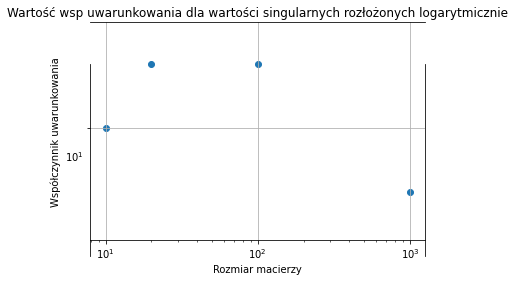

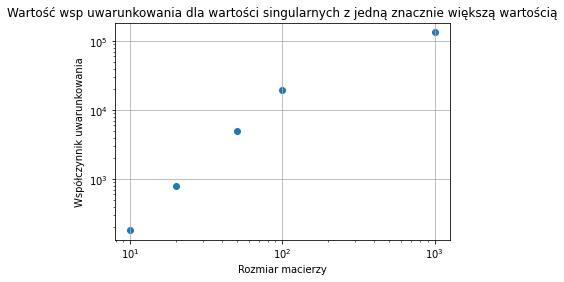

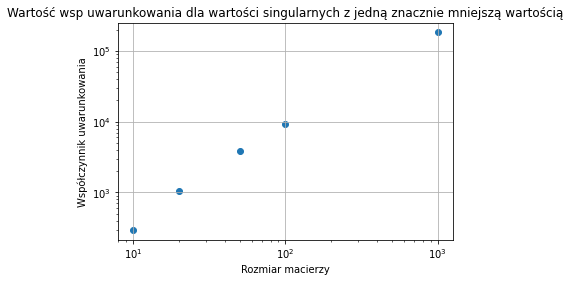

In [28]:
scatter_plot(m,cond_log, title = "Wartość wsp uwarunkowania dla wartości singularnych rozłożonych logarytmicznie")
scatter_plot(m,cond_one_high, title="Wartość wsp uwarunkowania dla wartości singularnych z jedną znacznie większą wartością")
scatter_plot(m,cond_one_low, title="Wartość wsp uwarunkowania dla wartości singularnych z jedną znacznie mniejszą wartością")

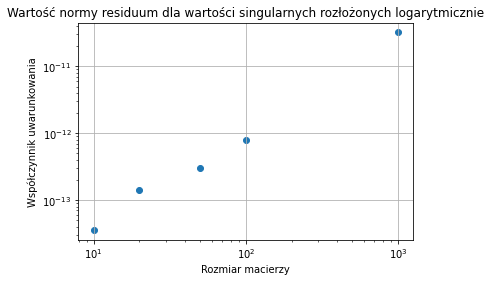

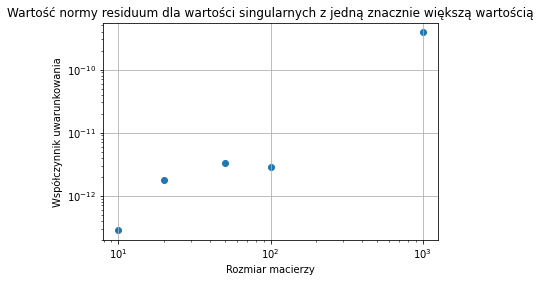

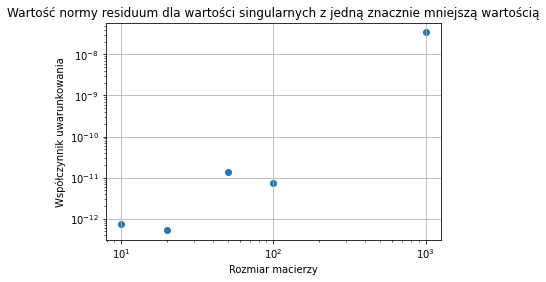

In [30]:
A_sing_log_norm = []
A_sing_high_norm = []
A_sing_low_norm = []

for inx in range(len(A_b_matrices)):
#Podmiana wartości dla wektora o rozłożeniu logarytmicznym

    A_sing_help = main.create_matrix_from_A(A_b_matrices[inx][0],sing_log[inx])
    result = np.linalg.solve(A_sing_help,A_b_matrices[inx][1])
    A_sing_log_norm.append(main.residual_norm(A_sing_help, result, A_b_matrices[inx][1]))

#Podmiana wartości dla wektora o jednej znacznie większej wartości

    A_sing_help = main.create_matrix_from_A(A_b_matrices[inx][0],sing_order_high[inx])
    result = np.linalg.solve(A_sing_help,A_b_matrices[inx][1])
    A_sing_high_norm.append(main.residual_norm(A_sing_help, result, A_b_matrices[inx][1]))

#Podmiana wartości dla wektora o jednej znacznie mniejszej wartości

    A_sing_help = main.create_matrix_from_A(A_b_matrices[inx][0],sing_order_low[inx])
    result = np.linalg.solve(A_sing_help,A_b_matrices[inx][1])
    A_sing_low_norm.append(main.residual_norm(A_sing_help, result, A_b_matrices[inx][1]))

scatter_plot(m,A_sing_log_norm, title = "Wartość normy residuum dla wartości singularnych rozłożonych logarytmicznie")
scatter_plot(m,A_sing_high_norm, title="Wartość normy residuum dla wartości singularnych z jedną znacznie większą wartością")
scatter_plot(m,A_sing_low_norm, title="Wartość normy residuum dla wartości singularnych z jedną znacznie mniejszą wartością")

Złe uwarunkowanie macierzy jest źródłem ogromnych błędów, które znacząco oddalają
uzyskany wynik od rzeczywistego.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)